# Proximal

Let $\gamma,\lambda>0$,

$$
P : \theta \mapsto = \sum_{i=1}^p \rho(\theta_{i})\quad\text{with}\quad \rho : t \mapsto =|\tanh(t)| = \biggl| \frac{e^t-e^{-t}}{e^t+e^{-t}} \biggr|
$$ 

We search 
$$
\operatorname{prox}_{\gamma, \lambda P} = \argmin_{x\in \mathbb{R}^p} \Bigl\{\lambda P + \frac{1}{2\gamma}||x-\cdot||_2^2 \Bigr\}
$$

By separability, we focus on univariate problem, find the minimizer of $m(\cdot, z)$ for a $z$ given.
$$
m(\cdot \ ; z) : x\in \mathbb{R} \mapsto\lambda\rho(x)+\frac{(x-z)^2}{2\gamma}
$$

For $x>0$, we define,
$$G : x \in \mathbb{R}\mapsto x+\gamma\lambda \rho'(x)$$

## $\lambda \gamma\leq\frac{3\sqrt{3}}{4}$

From my report, I find 

+ $\textbf{If}$ $\lambda\gamma \leq \frac{3\sqrt{3}}{4}$ AND $z > \lambda\gamma$, then $G^{-1}(z)$ is the only candidate to be the minimizer of $m$.

+ $\textbf{If}$ $\lambda\gamma \leq \frac{3\sqrt{3}}{4}$ AND $z \leq \lambda\gamma$, then 0 is the only candidate to be the minimizer of $m$.

## $\lambda \gamma > \frac{3\sqrt{3}}{4}$

For this part, it's harder and we will not solve systems to find some threshold like $\varphi$ for $P_\nu$ but we will only tests all candidates and see numerically which one is the minimizer.

We know $0$ is a candidate while $|z|\leq \lambda \gamma$ 

Then on $z>0$ (negative case is analogous), we can have at most one solution in  $]0,M]$ and at most one in $[\mu, +\infty[$ with $\theta := \arccos(\frac{3\sqrt{3}}{4\lambda\gamma})$

$$
M:=\operatorname{arctanh}\biggl(  \frac{2}{\sqrt3}\cos\!\Bigl(\tfrac{\theta+2\pi}{3}\Bigr)  \biggr),\qquad
\mu=:\operatorname{arctanh}\biggl(\frac{2}{\sqrt3}\cos\!\Bigl(\tfrac{\theta}{3}\Bigr)\biggr)
$$

$$
\boxed{
\begin{aligned}
G(M)&=\operatorname{arctanh}\!\Bigl(\tfrac{2}{\sqrt3}\cos\!\tfrac{\theta+2\pi}{3}\Bigr)
        +\frac{\sqrt3}{4}\,\sec\!\Bigl(\tfrac{\theta+2\pi}{3}\Bigr)\\[4pt]
G(\mu)&=\operatorname{arctanh}\!\Bigl(\tfrac{2}{\sqrt3}\cos\!\tfrac{\theta}{3}\Bigr)
        +\frac{\sqrt3}{4}\,\sec\!\Bigl(\tfrac{\theta}{3}\Bigr)
\end{aligned}}
$$


 $$a:=\lambda \gamma  \gtrless G(\mu) \Longleftrightarrow a  \gtrless \frac{\mu}{\tanh(\mu)^2} =: \Theta(\mu)$$

If there exists, then $\exists! \eta_1 \in ]0,M]$ such that $G(\eta_1)=z$ and  $\exists! \eta_2 \in [\mu, +\infty[$ such that $G(\eta_2)=z$.

Unless I made a mistake, I enumerate candidates according to $z$ and $a$, still assuming $a>\frac{3\sqrt{3}}{4}$.


+ $\text{If } a<\Theta(\mu) \text{ and }   z\in [0,a] \qquad 0 \text{ is the minimizer : G(x)=z hasn't solution}$
+ $\text{If } a>\Theta(\mu) \text{ and }   z\in [0,G(\mu)[ \qquad 0 \text{ is the minimizer : G(x)=z hasn't solution}$
+ $\text{If } a<\Theta(\mu) \text{ and }   z\in ]a, G(\mu)[ \qquad \eta_1 \text{ is the minimizer : } z\notin G(]\mu, +\infty])  \text{ and } z>a$
+ $\text{If } a>\Theta(\mu) \text{ and }   z\in [G(\mu), a[ \qquad 0\text{ xor } \eta_2 \text{ is the minimizer : } z\notin G(]0, M])$
+ $\text{If } z\in ]G(M), +\infty[\qquad \eta_2 \text{ is the minimizer : } z\notin G(]0,M]) \text{ and } z>G(M)\geq a$
+ $\text{If } z\in ]\max\{a, G(\mu)\},G(M)] \qquad \eta_1 \text{ xor } \eta_2 \text{ is the minimizer : } z>a$


In [28]:
using LinearAlgebra, Statistics, Random, Printf, Plots

In [3]:
function bisection(f, a, b; tol=1e-10, maxiter=1000, verbose=false)
    if f(a)==0
        return a, 0
    end
    if f(b)==0
        return b, 0
    end
    
    if verbose
        @printf("start with a = %.12f : f(a) = %.12f, b = %.12f : f(b) = %.12f\n", a, f(a), b, f(b))
    end
    fa, fb = f(a), f(b)
    # TODO : attention ! special pour ce cas et se rappeler pourquoi
    while f(a)*f(b)>0
        b*=2
        if b> 1e10
            return a, -1
        end
        
    end
    # @assert fa * fb < 0 "Need f(a)f(b)<0 : $(fa) | $(fb)"
    for k in 1:maxiter
        m  = 0.5*(a+b)
        fm = f(m)
        if abs(fm) <= tol || 0.5*(b-a) <= tol
            if verbose
                @printf("bisection: found %.12f in %d iterations | a = %.12f, b = %.12f, f(a) = %.12f, f(b) = %.12f\n", m, k, a, b, fa, fb)
            end         
            return m, k
        elseif fm>0
            b, fb = m, fm
        else
            a, fa = m, fm
        end
    end
    error("No convergence in $maxiter iterations")
end

bisection (generic function with 1 method)

In [1]:
rho(x)  = abs(tanh(x))
rho_prime(x) = sign(x)*sech(abs(x))^2

rho_prime (generic function with 1 method)

In [6]:
sech2(x) = inv(cosh(x)^2)
Gpos(x, a) = x + a*sech2(x)  # G(x) = x + a*sech^2(x) 
m_cost(x, z, λ, γ) = λ*abs(tanh(x)) + (x - z)^2/(2γ)

m_cost (generic function with 1 method)

In [7]:
ACRIT = 3*sqrt(3)/4 

1.299038105676658

In [29]:
# get all values we need when we are in the case : a> ACRIT = 3*sqrt(3)/4
function turning_points(a)
    @assert a > ACRIT "Need a > ACRIT = $(ACRIT) — got $(a)"
    h(t) = 2a*(1 - t^2)*t - 1
    t1, _ = bisection(h, 0.0, 1/sqrt(3))
    t2, _ = bisection(h, 1/sqrt(3), 1.0)
    M  = atanh(t1)
    μ  = atanh(t2)
    GM  = Gpos(M, a)
    Gμ  = Gpos(μ, a)
    return M, μ, GM, Gμ
end

# from ChatGPT : allow to define a bound for the right bracket when it's +infty
function right_bracket(y, a; lo=1.0, maxb=1e6)
    b = max(lo, y, 1.0)
    while Gpos(b, a) < y && b < maxb
        b *= 2
    end
    return b
end

function proximal(z::Real, γ::Real, λ::Real)
    z == 0 && return 0.0
    sgn = sign(z)
    y = abs(z)
    a = λ*γ

    #  des fois il trouve aucun candidat. Je n'ai pas compris pourquoi (je l'ai fait à la va vite) : le graphe est bien et ça regle le souci facilement
    candidates = [0.] #  TODO : supprimer 0 et faire qu'à la fin on trouve OBLIGATOIREMENT au moins un candidat
    # 0 as candidate
    if y <= a
        push!(candidates, 0.0)
    end

    if a <= ACRIT
        if y > a
            F = x -> Gpos(x, a) - y
            b = right_bracket(y, a; lo=0.0) 
            r, _ = bisection(F, 0.0, b)
            push!(candidates, r)
        end
    else  # eta_1 and eta_2 as candidates
        M, μ, GM, Gμ = turning_points(a)
        F = x -> Gpos(x, a) - y

        if y >= Gμ - 1e-14
            # right root in (μ, ∞)
            b = right_bracket(y, a; lo=max(μ + 1.0, μ*1.25))
            r_right, _ = bisection(F, μ, b)
            push!(candidates, r_right)

            # left root in (0, M) when y ∈ [a, GM]
            if y >= a - 1e-14 && y <= GM + 1e-14
                r_left, _ = bisection(F, 0.0, M)
                push!(candidates, r_left)
            end
        end
    end

    bestx = candidates[1]
    bestv = m_cost(bestx, y, λ, γ)
    for k in 2:length(candidates)
        v = m_cost(candidates[k], y, λ, γ)
        if v < bestv
            bestv = v
            bestx = candidates[k]
        end
    end
    return sgn*bestx
end

proximal (generic function with 1 method)

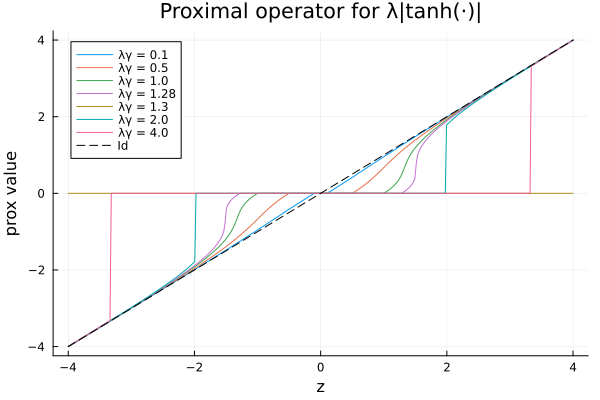

In [37]:
γ = 1.0
lambdas = [0.1, 0.5, 1.0, 1.28,1.3, 2.0, 4.0]
z_grid = range(-4, 4; length=400)

plt = plot(title="Proximal operator for λ|tanh(·)|",
           xlabel="z", ylabel="prox value", legend=:topleft)

for λ in lambdas
    plot!(plt, z_grid, proximal.(z_grid, γ, λ), label="λγ = $λ")
end

plot!(plt, z_grid, z_grid, linestyle=:dash, color=:black, label="Id")
display(plt)

In [31]:
savefig(plt, "prox_tanh.png")

"c:\\Users\\Le R\\Desktop\\Code\\Projets\\Geneve\\STAGE-GENEVE\\RAPHAEL\\notebook_explain\\prox_tanh.png"